
# Logistic Regression - Case Study II



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### import data

In [2]:
#read the data
df = pd.read_csv("conversion_data.csv")

In [3]:
#sneak peek into the data
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.shape

(316200, 6)

In [5]:
#more details about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
#target class frequency
df.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [7]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Preparing Data For Modeling

In [8]:
#dummy data for categorical variables
df = pd.get_dummies(df, columns=['country','source'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  316200 non-null  int64
 1   new_user             316200 non-null  int64
 2   total_pages_visited  316200 non-null  int64
 3   converted            316200 non-null  int64
 4   country_China        316200 non-null  uint8
 5   country_Germany      316200 non-null  uint8
 6   country_UK           316200 non-null  uint8
 7   country_US           316200 non-null  uint8
 8   source_Ads           316200 non-null  uint8
 9   source_Direct        316200 non-null  uint8
 10  source_Seo           316200 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 11.8 MB


In [10]:
input_columns = [column for column in df.columns if column != 'converted']
output_column = 'converted'
print (input_columns)
print (output_column)

['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']
converted


In [11]:
#input data
X = df.loc[:,input_columns].values
#output data 
y = df.loc[:,output_column]
#shape of input and output dataset
print (X.shape, y.shape)

(316200, 10) (316200,)


### Modeling : Logistic Regression

In [12]:
#import model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
#Split the data into training and test data (70/30 ratio)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100, stratify=y)


In [14]:
#validate the shape of train and test dataset
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(221340, 10)
(221340,)
(94860, 10)
(94860,)


In [15]:
#check on number of positive classes in train and test data set
print(np.sum(y_train))
print(np.sum(y_test))

7140
3060


## Train the Logistic Model

In [16]:
#fit the logisitc regression model on training dataset 
logreg = LogisticRegression().fit(X_train,y_train)

C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
logreg.score(X_train, y_train)

0.9861118641004789

In [18]:
#validate the model performance on unseen data
logreg.score(X_test, y_test)

0.9863377609108159

In [19]:
#make predictions on unseen data
predictions=logreg.predict(X_test)

## Results 

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,target_names=["Non Converted", "Converted"]))

               precision    recall  f1-score   support

Non Converted       0.99      1.00      0.99     91800
    Converted       0.86      0.69      0.76      3060

     accuracy                           0.99     94860
    macro avg       0.92      0.84      0.88     94860
 weighted avg       0.99      0.99      0.99     94860



In [21]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.8424128540305011

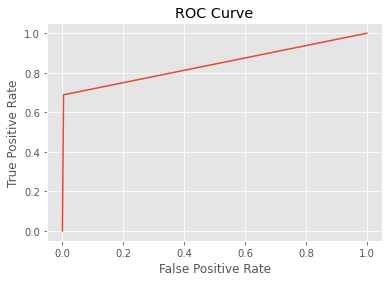

In [22]:
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() 

## Alter the threshold

In [23]:
predictions[50:60]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
predicted_probs=logreg.predict_proba(X_test)

In [25]:
predicted_probs[50:60]

array([[9.20524849e-01, 7.94751509e-02],
       [5.38145223e-02, 9.46185478e-01],
       [9.99886140e-01, 1.13859733e-04],
       [9.99768224e-01, 2.31775974e-04],
       [9.99465466e-01, 5.34534133e-04],
       [9.83337724e-01, 1.66622765e-02],
       [9.83789646e-01, 1.62103541e-02],
       [9.62983234e-01, 3.70167659e-02],
       [9.98795492e-01, 1.20450790e-03],
       [9.99960687e-01, 3.93125253e-05]])

In [27]:
#Alter the threshold
y_pred_lower_threshold = logreg.predict_proba(X_test)[:,1] >0.10

In [28]:
y_pred_lower_threshold[50:60]

array([False,  True, False, False, False, False, False, False, False,
       False])

In [29]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     91800
           1       0.54      0.88      0.67      3060

    accuracy                           0.97     94860
   macro avg       0.77      0.93      0.83     94860
weighted avg       0.98      0.97      0.97     94860



## Hyper parameter Tunning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
#fit the model
log_model=LogisticRegression()

In [32]:
#create parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 15,20,100],'max_iter':[50,100,200,500]}

In [33]:
#Run grid search algorithm
grid_search = GridSearchCV(log_model, param_grid, cv=5)

In [34]:
#Fit the model on training data
grid_search.fit(X_train, y_train)

C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 100],
                         'max_iter': [50, 100, 200, 500]})

In [35]:
#validate the new score of model
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.99


## Best Parameters

In [36]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 20, 'max_iter': 50}
Best cross-validation score: 0.99


In [37]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
LogisticRegression(C=20, max_iter=50)


In [38]:
# Building model with best parameters

logreg = LogisticRegression(class_weight='balanced',C=10,max_iter=50).fit(X_train,y_train)

C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#validate the model performance on unseen data
logreg.score(X_test, y_test)

0.9426944971537002

In [40]:
#make predictions on unseen data
predictions=logreg.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,target_names=["Non Converted", "Converted"]))

               precision    recall  f1-score   support

Non Converted       1.00      0.94      0.97     91800
    Converted       0.35      0.94      0.51      3060

     accuracy                           0.94     94860
    macro avg       0.68      0.94      0.74     94860
 weighted avg       0.98      0.94      0.95     94860

